In [1]:
import pandas as pd

In [2]:
services = pd.read_excel('data_services.xlsx',parse_dates=["date_start","date_end"],date_format='mixed')

In [3]:
services.head()

,id,first_name,last_name,gender,dpto,internal_cost,price,service,date_start,date_end
0,1,Silva,Koba,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31
1,2,Chrissy,Fudge,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12
2,3,Danell,Waite,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20
3,4,Oralia,Smolan,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13
4,5,Ericha,Ghione,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24


In [4]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             150 non-null    int64         
 1   first_name     138 non-null    object        
 2   last_name      150 non-null    object        
 3   gender         150 non-null    object        
 4   dpto           139 non-null    object        
 5   internal_cost  150 non-null    float64       
 6   price          150 non-null    float64       
 7   service        150 non-null    object        
 8   date_start     150 non-null    datetime64[ns]
 9   date_end       150 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 11.8+ KB


In [5]:
services.fillna({'dpto': "Extranjero"},inplace= True)

In [6]:
services["dpto"].isnull().sum()

0

In [7]:
#services["nombre_completo"] = services["first_name"].fillna("Mr/Ms")+ " " +services["last_name"]
services["nombre_completo"]= services["first_name"].fillna("Mr/Ms").str.cat(services["last_name"],sep=' ')


In [8]:
services.head()

,id,first_name,last_name,gender,dpto,internal_cost,price,service,date_start,date_end,nombre_completo
0,1,Silva,Koba,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31,Silva Koba
1,2,Chrissy,Fudge,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12,Chrissy Fudge
2,3,Danell,Waite,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20,Danell Waite
3,4,Oralia,Smolan,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13,Oralia Smolan
4,5,Ericha,Ghione,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24,Ericha Ghione


In [9]:
services["date_start"] = pd.to_datetime(services["date_start"],format="mixed")

In [10]:
import datetime as dt
services["tiempo_trabajado"] = abs((services["date_end"]-services["date_start"])).dt.days

In [11]:
services.head()

,id,first_name,last_name,gender,dpto,internal_cost,price,service,date_start,date_end,nombre_completo,tiempo_trabajado
0,1,Silva,Koba,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31,Silva Koba,152
1,2,Chrissy,Fudge,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12,Chrissy Fudge,84
2,3,Danell,Waite,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20,Danell Waite,153
3,4,Oralia,Smolan,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13,Oralia Smolan,176
4,5,Ericha,Ghione,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24,Ericha Ghione,180


In [12]:
services["beneficios"] = services["price"]-services["internal_cost"]

In [13]:
services["beneficios"].sum()

19582.38

In [14]:
services["mes"] = services["date_end"].dt.month

services["año"] = services["date_end"].dt.year

In [15]:
services.groupby(['año',"mes"]).agg(
    {
        'beneficios':['sum','mean']
    }
)

beneficios            
                sum        mean
año  mes                       
2021 1       713.04  142.608000
     2      2672.78  133.639000
     3      3606.36  138.706154
     4      1453.43   80.746111
     5      5536.27  145.691316
     6      3322.91  151.041364
     7      1516.88  108.348571
     8       760.71  108.672857

In [16]:
services.groupby(['service']).agg(
    {
        'beneficios': ['sum', 'mean']
    }
)

beneficios            
                                  sum        mean
service                                          
Análisis                      4084.33  120.127353
Capacitación                  5194.19  140.383514
Implementación de Software    5137.55  131.732051
Visualización                 5166.31  129.157750

In [17]:
services.groupby('service').agg(
    {
        'internal_cost': 'mean'
    }
).sort_values(by='internal_cost', ascending=False)

,internal_cost
service,
Capacitación,90.042703
Análisis,80.720588
Visualización,73.782500
Implementación de Software,71.052821


In [18]:
services["ratio"]=services["internal_cost"]/services["price"]


In [19]:
services.groupby('service').agg(
    {
        'ratio': 'mean'
    }
).sort_values(by='ratio', ascending=False)

,ratio
service,
Análisis,0.608850
Implementación de Software,0.483264
Capacitación,0.480105
Visualización,0.447544


In [20]:
#vi. ¿Cuál es el servicio que en promedio lleva más tiempo realizar?
services.groupby('service').agg(
    {
        'tiempo_trabajado': 'mean'
    }
).sort_values(by='tiempo_trabajado', ascending=False)

,tiempo_trabajado
service,
Implementación de Software,140.307692
Visualización,128.850000
Capacitación,123.594595
Análisis,105.794118


<Axes: xlabel='dpto'>

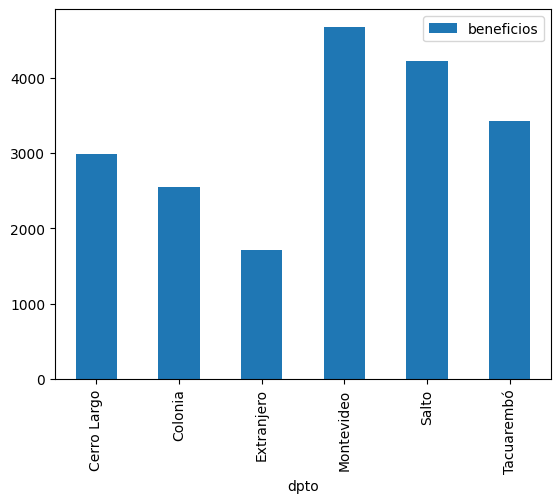

In [21]:
#Una visualización que muestre el total beneficio por departamento en un gráfico de barras verticales.
services.groupby(['dpto']).agg(
    {
        'beneficios': 'sum'
    }
).plot(kind = "bar")

<Axes: ylabel='gender'>

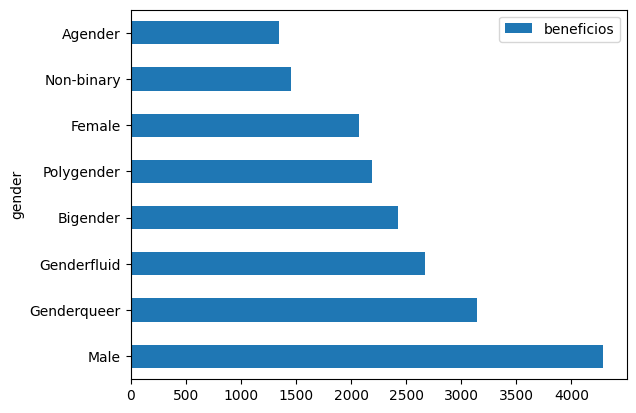

In [24]:
#ii. Una gráfica de barras horizontales que muestre el total beneficio por el género del cliente.
services.groupby(['gender']).agg(
    {
        'beneficios': 'sum'
    }
).sort_values(by='beneficios', ascending=False).plot(kind = "barh")

<Axes: xlabel='date_end'>

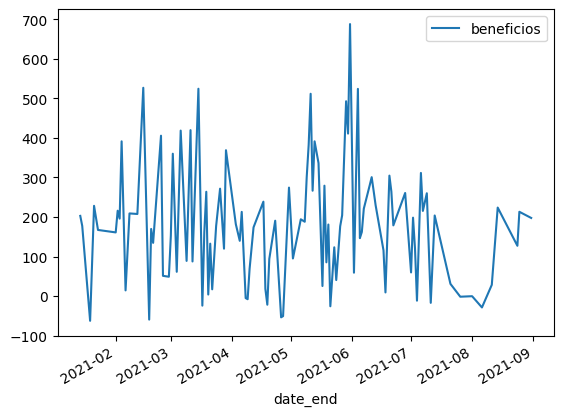

In [23]:
#iii. Una gráfica que muestre la evolución de los beneficios, mediante la fecha de finalización.
services.groupby(['date_end']).agg(
    {
        'beneficios': 'sum'
    }
).plot()